In [ ]:
# https://www.somatematica.com.br/jogos/hanoi/
def hanoi_tower(n, start, aux, end, loop='first'):
  '''
    From a pile of n discs (start), move discs to destiny (end pile).
    You should start moving the disc at the top (n=1 is the smallest disc) and you cannot
    placa a larger disc above a smaller one.
  '''
  if n == 1:
    print(loop, 'disc', n, 'Moving from', start , 'to', end)
    return
  hanoi_tower(n-1, start, end, aux)
  print(loop, 'disc', n, 'Moving from', start , 'to', end)
  hanoi_tower(n-1, aux, start, end, loop='sec')
hanoi_tower(3, 'A', 'B', 'C')

first disc 1 Moving from A to C
first disc 2 Moving from A to B
sec disc 1 Moving from C to B
first disc 3 Moving from A to C
first disc 1 Moving from B to A
sec disc 2 Moving from B to C
sec disc 1 Moving from A to C


In [ ]:
# Good material: https://www.idc-online.com/technical_references/pdfs/information_technology/Tree_Recursion_in_Python.pdf
# https://www.idc-online.com/resources/technical-references/information-technology-technical-references.html
def fib(n):
  """Element at n position on the Fibonacci sequence (0,1,1,2,3,5,8,13,...).
  This strategy grows exponentially. So for big n it is veryyy compute intensive.
  An alternative is to calc using the fibonacci iterative function (below)."""
  if n == 1:
    return 0
  if n == 2:
    return 1
  return fib(n-2) + fib(n-1)

result = fib(6)
result

5

In [ ]:
def fib_interactive(n):
  """Fibonacci interactive. 
  This option does not use recursion and 
  it is not computational intensive."""
  fibo_sequence = []
  prev, curr = 1, 0
  for i in range(n-1):
    prev, curr = curr, prev + curr
    fibo_sequence.append(prev)
  fibo_sequence.append(curr)
  print(fibo_sequence)
  return curr

result = fib_interactive(5)
result

[0, 1, 1, 2, 3]


3

In [ ]:
# Fibonnaci with Dynamic Programming.

def fib_with_dynamic_programming(n):
  dp = [0]*(n+1)
  dp[0] = 0
  dp[1] = 1
  for i in range(2, len(dp)):
    dp[i] = dp[i-1] + dp [i-2]
  return dp[n]

fib_with_dynamic_programming(8)

21

In [ ]:
# recursive sum
def recursive_sum(n):
  """Recursive sum of n numbers"""
  if n == 1:
    return n
  return n + recursive_sum(n-1)

total = recursive_sum(6)
total

21

In [ ]:
# Recursion Tree

# What is number of ways to climb a stair until the 10th step  if you only give steps of these types: 2, 4, 5 or 8?
class Tree(object):
  def __init__(self):
    self.call: str = ''
    self.returned: Any = None
    self.children: List[Tree] = []

In [ ]:
def ways_to_climb(n, possible_steps, tree):
  tree.call = 'ways_to_climb(' + str(n) + ')'
  if n == 0:
    tree.returned = 1
    return 1
  else:
    nb_ways = 0
    for steps in possible_steps:
      if(n-steps) >= 0:
        child = Tree()
        tree.children.append(child)
        nb_ways += ways_to_climb(n-steps, possible_steps, child)
    tree.returned = nb_ways
    return nb_ways

In [ ]:
def print_tree(tree, indent=''):
  INDENT_SIZE = 4
  if tree is None or len(tree.children) == 0:
    print(tree.call + ' returned ' + str(tree.returned))
  else:
    print(tree.call + ' returned ' + str(tree.returned))
    for child in tree.children[:-1]:
      print(indent + '|' + '-' * INDENT_SIZE, end='')
      print_tree(child, indent + '|' + '' * INDENT_SIZE)
    child = tree.children[-1]
    print(indent + ' L' + '-' * INDENT_SIZE, end='')
    print_tree(child, indent + ' ' * INDENT_SIZE)

In [ ]:
n = 3
possible_steps = [1,2]
recursion_tree = Tree()
ways_to_climb(n, possible_steps, recursion_tree)
print_tree(recursion_tree)

ways_to_climb(3) returned 3
|----ways_to_climb(2) returned 2
||----ways_to_climb(1) returned 1
|| L----ways_to_climb(0) returned 1
| L----ways_to_climb(0) returned 1
 L----ways_to_climb(1) returned 1
     L----ways_to_climb(0) returned 1


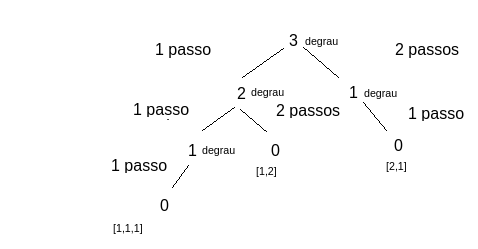

In [ ]:
from IPython.display import Image
Image(filename='/content/ways_to_climb.png', embed=True)

In [ ]:
# Memoization. The ideia is to store the results in order to avoid recalculations. 
# It solution uses a top to bottom approach.

def ways_to_climb_with_memoization(n, possible_steps, lookup):
  key = str(n)
  if key in lookup:
    return lookup[key]
  elif n == 0:
    lookup[key] = 1
    return lookup[key]
  else:
    nb_ways = 0
    for steps in possible_steps:
      if(n-steps) >= 0:
        nb_ways += ways_to_climb_with_memoization(n-steps, possible_steps, lookup)
  lookup[key] = nb_ways
  print(lookup)
  return lookup[key]

n = 3
possible_steps = [1,2]
ways_to_climb_with_memoization(n, possible_steps, {})

{'0': 1, '1': 1}
{'0': 1, '1': 1, '2': 2}
{'0': 1, '1': 1, '2': 2, '3': 3}


3

In [ ]:
# Dynamic Programming. It solution uses a bottom up approach.
# Dynamic Programming is an optimization over plain recursion. 
# https://medium.com/@fabianterh/how-to-solve-the-knapsack-problem-with-dynamic-programming-eb88c706d3cf
# https://www.youtube.com/watch?v=nLmhmB6NzcM
# https://www.youtube.com/watch?v=NnD96abizww
# https://www.youtube.com/watch?v=ipp-pNRIp4g
# This approach tries to find a relation between the sub problems, compute the next value
# starting from the ones already computed.
# The idea is to simply store the results of subproblems, so that we do not have to re-compute them when needed later. 
# This simple optimization reduces time complexities.

def ways_to_climb_with_dynamic_programming(n, possible_steps):
  dp = [0]*(n+1)
  dp[0] = 1 # base case
  for i in range(1, len(dp)):
    nb_ways = 0
    for steps in possible_steps:
      if(i-steps) >= 0:
        nb_ways += dp[i-steps]
    dp[i] = nb_ways
  return dp[n]

n = 3
possible_steps = [1,2]
ways_to_climb_with_dynamic_programming(n, possible_steps)

3

In [ ]:
# LCS (Longest Common String) with recursion
# https://www.youtube.com/watch?v=sSno9rV8Rhg&t=2s

def lcs_recursion(i, j, a, b):
  if a[i] == '0' or b[j] == '0':
    return 0
  elif a[i] == b[j]:
    return 1 + lcs_recursion(i+1, j+1, a, b)
  else:
    return max(lcs_recursion(i+1, j, a, b), lcs_recursion(i, j+1, a, b))

#a = 'bd0'
#b = 'abcd0'
a = 'bdefgh0'
b = 'abcd0'
lcs_recursion(0, 0, a, b)

2

In [5]:
# LCS (Longest Common String) with Dynamic Programming
# https://www.youtube.com/watch?v=sSno9rV8Rhg&t=2s

def lcs_dynamic_programming(i, j, a, b, store):

  if i == 0 or  j == 0:
    # first row and first column all zeros
    store[(i, j)] = 0
  elif a[i] == b[j]:
    if (i, j) not in store:
      print(i,j, a[i], b[j])
    # sum 1 to diagonal value
    store[(i, j)]  = 1 + lcs_dynamic_programming(i-1, j-1, a, b, store)
  else:
    # get the max between beside and above
    store[(i, j)] = max(lcs_dynamic_programming(i-1, j, a, b, store), lcs_dynamic_programming(i, j-1, a, b, store))
  return store.get((i, j))

#a = '0bd'
#b = '0abcd'
a = '0bdefghj'
b = '0abcdij'
store = {(0, 0): 0}
lcs_dynamic_programming(len(a)-1, len(b)-1, a, b, store)

7 6 j j
1 2 b b
2 4 d d


3